# 2 Linear Algebra

## 2.12 Example: Principal Component Analysis

In [1]:
import torch
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import proj3d
%matplotlib inline

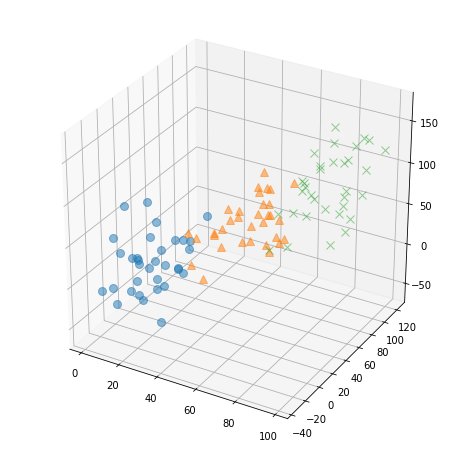

In [2]:
def generate_samples(x_from, x_to):
    num_samples = x_to - x_from + 1
    X1 = torch.linspace(x_from, x_to, num_samples)
    X2 = X1 + torch.randn(num_samples) * 20
    X3 = X1 + torch.randn(num_samples) * 30
    return torch.stack([X1, X2, X3], 1)

C1 = generate_samples(1, 33)
C2 = generate_samples(34, 66)
C3 = generate_samples(67, 99)

fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111, projection='3d')
ax.plot(C1[:,0].numpy(), C1[:,1].numpy(),  C1[:,2].numpy(), 'o', markersize=8, alpha=0.5)
ax.plot(C2[:,0].numpy(), C2[:,1].numpy(),  C2[:,2].numpy(), '^', markersize=8, alpha=0.5)
ax.plot(C3[:,0].numpy(), C3[:,1].numpy(),  C3[:,2].numpy(), 'x', markersize=8, alpha=0.5)

In [3]:
X_all = torch.stack((C1, C2, C3), dim=0).reshape(99,-1)
eigvals, eigvecs = X_all.t().matmul(X_all).eig(eigenvectors=True)
eigvals = eigvals[:,0]

# sort by eigenvalue in descending order
eig = list(zip(eigvals, eigvecs))
eig.sort(key = lambda x: x[0], reverse=True)

# projecting from 3D to 2D
D = torch.stack((eig[0][1], eig[1][1]))
X_2d = D.matmul(X_all.t()).t()
print("The shape of original samples: ", X_all.shape)
print("The shape of converted samples: ", X_2d.shape)

The shape of original samples:  torch.Size([99, 3])
The shape of converted samples:  torch.Size([99, 2])


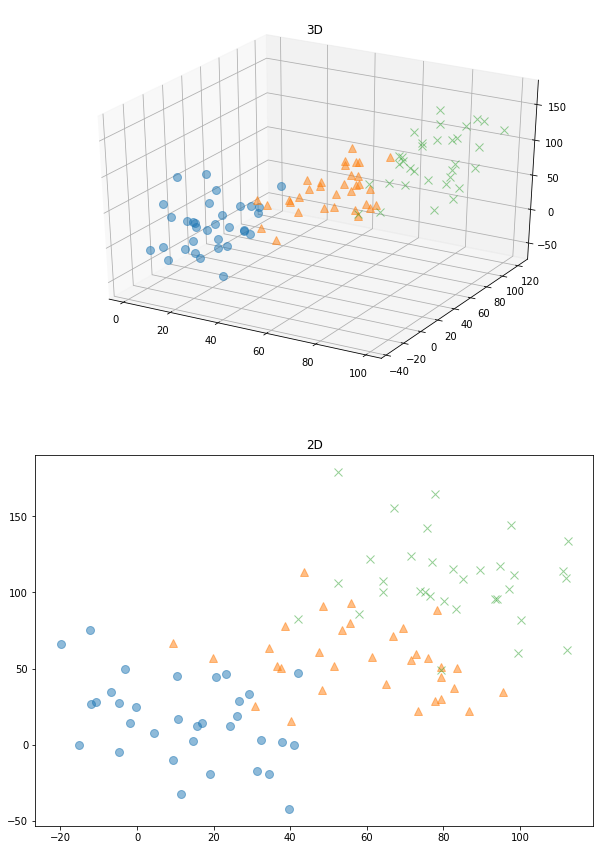

In [4]:
fig = plt.figure(figsize=(10,15))

ax = fig.add_subplot(211, projection='3d')
plt.title("3D")
ax.plot(C1[:,0].numpy(), C1[:,1].numpy(),  C1[:,2].numpy(), 'o', markersize=8, alpha=0.5)
ax.plot(C2[:,0].numpy(), C2[:,1].numpy(),  C2[:,2].numpy(), '^', markersize=8, alpha=0.5)
ax.plot(C3[:,0].numpy(), C3[:,1].numpy(),  C3[:,2].numpy(), 'x', markersize=8, alpha=0.5)

ax = fig.add_subplot(212)
plt.title("2D")
ax.plot(X_2d[:33,0].numpy(), X_2d[:33,1].numpy(), 'o', markersize=8, alpha=0.5)
ax.plot(X_2d[33:66,0].numpy(), X_2d[33:66,1].numpy(), '^', markersize=8, alpha=0.5)
ax.plot(X_2d[66:,0].numpy(), X_2d[66:,1].numpy(), 'x', markersize=8, alpha=0.5)